In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Using latitude and longitude to manually label roundabout collisions

In [ ]:
df = pd.read_csv('/content/drive/My Drive/UWaterloo/CAPSTONE 🧢🪨/3. Resources & data/Waterloo Collision Reports/Traffic_Collisions_-3169257883124904994.csv')
df = df[["ACCIDENTNUM","LONGITUDE","LATITUDE"]]
#print(df)

df_roundabout = pd.read_csv ('/content/drive/MyDrive/UWaterloo/CAPSTONE 🧢🪨/3. Resources & data/Waterloo Collision Reports/Kittleson_roundabout_data - clean.csv')
print(df_roundabout.dtypes)


df.rename(columns={'LONGITUDE': 'Longitude', 'LATITUDE': 'Latitude'}, inplace=True)
df_roundabout.rename(columns={'Lng': 'Longitude', 'Lat': 'Latitude'}, inplace=True)


City                       object
State\nCounty\nCountry     object
Intersection               object
Lat                       float64
Lng                       float64
Type                       object
Status                     object
Control Type               object
Other Control              object
Approaches                  int64
Driveways                   int64
ICD (m)                   float64
Functional Class           object
LaneType                   object
Year Completed            float64
Comments                   object
dtype: object


In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of the Earth in meters
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

def find_closest_points(df_a, df_b):
    closest_points = []
    distances = []

    for _, row_a in df_a.iterrows():
        min_distance = float('inf')
        closest_point = None

        for _, row_b in df_b.iterrows():
            distance = haversine(row_a['Latitude'], row_a['Longitude'], row_b['Latitude'], row_b['Longitude'])
            if distance < min_distance:
                min_distance = distance
                closest_point = row_b

        closest_points.append(closest_point)
        distances.append(min_distance)

    df_a['Closest_Point'] = closest_points
    df_a['Distance_to_Closest_Point'] = distances
    return df_a

# Find closest points and distances
result_df = find_closest_points(df, df_roundabout)
print(result_df)

# Add a column for distance category
def categorize_distance(distance):
    if distance < 20:
        return 'High'
    elif distance < 100:
        return 'Medium'
    else:
        return 'Low'

result_df['Distance_Category'] = result_df['Distance_to_Closest_Point'].apply(categorize_distance)
#result_df.to_csv('/content/drive/MyDrive/UWaterloo/CAPSTONE 🧢🪨/3. Resources & data/Waterloo Collision Reports/test.csv')



     ACCIDENTNUM  Longitude   Latitude  \
0      15-000127 -80.479168  43.390668   
1      15-000229 -80.415610  43.434656   
2      15-000477   0.000000   0.000000   
3      15-001276 -80.491859  43.412599   
4      15-001486 -80.491115  43.449443   
...          ...        ...        ...   
8923   503148584 -80.510508  43.438484   
8924   503153018 -80.513016  43.440785   
8925   503153047 -80.532036  43.439551   
8926   503167951 -80.450061  43.457488   
8927   99-151109 -80.464668  43.461301   

                                          Closest_Point  \
0     City                                          ...   
1     City                                          ...   
2     City                                          ...   
3     City                                          ...   
4     City                                          ...   
...                                                 ...   
8923  City                                          ...   
8924  City             

In [ ]:
df = pd.read_csv('/content/drive/My Drive/UWaterloo/CAPSTONE 🧢🪨/3. Resources & data/Waterloo Collision Reports/Traffic_Collisions_-3169257883124904994.csv')
df["Distance_Category"] = result_df["Distance_Category"]
df["ACCIDENTNUM2"] = result_df["ACCIDENTNUM"]
df.to_csv('/content/drive/MyDrive/UWaterloo/CAPSTONE 🧢🪨/3. Resources & data/Waterloo Collision Reports/results.csv')

# Load & make sense of data
Open-source collision report CSV, sponsored by city of Kitchener, Waterloo, Cambridge: https://data.waterloo.ca/datasets/KitchenerGIS::traffic-collisions/about

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/CAPSTONE 🧢🪨/3. Resources & data/Waterloo Collision Reports/Traffic_Collisions_-3169257883124904994.csv')

Mounted at /content/drive


In [ ]:
for column in [
    'ACCIDENT_YEAR',
    'ACCIDENTLOCATION',
    'CLASSIFICATIONOFACCIDENT',
    'IMPACTLOCATION',
    'INITIALIMPACTTYPE',
    'TRAFFICCONTROL'
]:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in ACCIDENT_YEAR:
[2015 2016 2017 2018 2019 2020 2021 2022]


Unique values in ACCIDENTLOCATION:
['Intersection related' 'At/near private drive' 'Other' 'At intersection'
 'Non intersection' 'At railway crossing' 'Overpass or bridge'
 'Underpass or tunnel']


Unique values in CLASSIFICATIONOFACCIDENT:
['P.D. only' 'Non-fatal injury' 'Non-reportable' 'Fatal injury' 'unknown'
 'Other']


Unique values in IMPACTLOCATION:
['Off highway' 'Thru lane' 'Not on roadway - left side'
 'Within intersection' 'Not on roadway - right side' 'Right shoulder'
 'Left turn lane' 'Other' 'Right turn channel' 'Left shoulder'
 'Right turn lane' 'Two-way left turn lane' 'Passing lane']


Unique values in INITIALIMPACTTYPE:
['SMV other' 'SMV unattended vehicle' 'Turning movement' 'Approaching'
 'Rear end' 'Angle' 'Other' 'Sideswipe']


Unique values in TRAFFICCONTROL:
['Stop sign' 'No control' 'Traffic signal' 'School bus' 'Yield sign'
 'Other' 'Traffic controller' 'Ped. crossover' 'School guard'

## What do they mean by 'At intersection' and 'Intersection-related'?
Where is the impact location and what types of intersections are included? Check out railway crossings too

In [ ]:
filtered_df = df[df['ACCIDENTLOCATION'].isin(['At intersection', 'At railway crossing', 'Intersection related'])]

# Distribution of IMPACTLOCATION for each ACCIDENTLOCATION
print("Distribution of IMPACTLOCATION for filtered ACCIDENTLOCATION categories:")
impactlocation_distribution = filtered_df.groupby('ACCIDENTLOCATION')['IMPACTLOCATION'].value_counts()
print(impactlocation_distribution)

print("\n\n")

print("Distribution of TRAFFICCONTROL for filtered ACCIDENTLOCATION categories:")
trafficcontrol_distribution = filtered_df.groupby('ACCIDENTLOCATION')['TRAFFICCONTROL'].value_counts()
print(trafficcontrol_distribution)

Distribution of IMPACTLOCATION for filtered ACCIDENTLOCATION categories:
ACCIDENTLOCATION      IMPACTLOCATION             
At intersection       Within intersection            1469
                      Thru lane                       148
                      Left turn lane                   16
                      Not on roadway - right side      16
                      Right turn lane                  12
                      Not on roadway - left side        9
                      Right shoulder                    8
                      Off highway                       5
                      Right turn channel                3
                      Other                             3
At railway crossing   Thru lane                        16
                      Not on roadway - right side       2
                      Other                             1
                      Right shoulder                    1
Intersection related  Thru lane                       839
       

# General intersection analysis

## Percentage of collisions occuring at intersections, related to intersections, or railway crossings

Percent of total collisions at each location, 2015-2022:
ACCIDENTLOCATION
At intersection         18.918011
Intersection related    15.468190
At railway crossing      0.224014
Name: count, dtype: float64




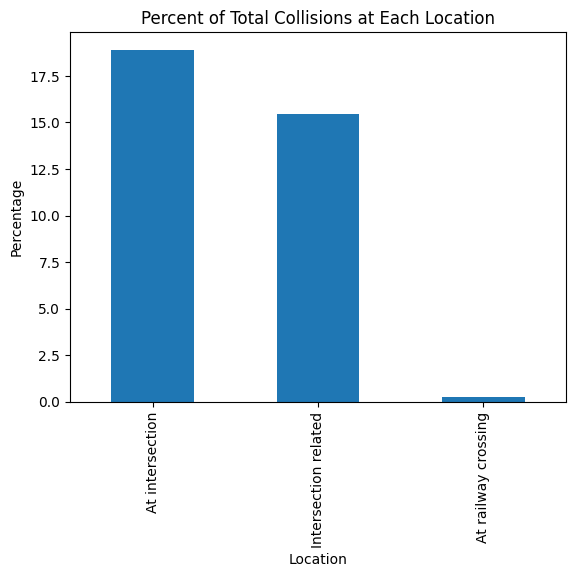

Percent of total collisions at each location, grouped by ACCIDENT_YEAR:
ACCIDENTLOCATION  At intersection  At railway crossing  Intersection related
ACCIDENT_YEAR                                                               
2015                    20.296643             0.312256             11.787666
2016                    19.734789             0.156006             14.040562
2017                    21.065183             0.079491             13.513514
2018                    18.839361             0.252313             17.998318
2019                    19.567901             0.308642             16.172840
2020                    15.384615             0.219780             19.120879
2021                    15.246098             0.240096             16.206483
2022                    18.558559             0.180180             17.117117


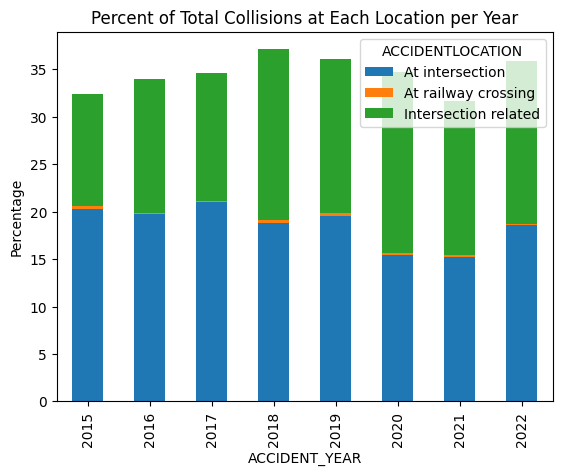

In [ ]:
filtered_df = df[df['ACCIDENTLOCATION'].isin(['At intersection', 'Intersection related', 'At railway crossing'])]

# 1. Percent of total collisions happening at each location (overall)
total_collisions = len(df)
location_collision_counts = filtered_df['ACCIDENTLOCATION'].value_counts()
location_percent_total = (location_collision_counts / total_collisions) * 100

print("Percent of total collisions at each location, 2015-2022:")
print(location_percent_total)
print("\n")

location_percent_total.plot(kind='bar', title="Percent of Total Collisions at Each Location", ylabel="Percentage", xlabel="Location")
plt.show()

# 2. Percent of collisions at each location grouped by year
yearly_total_collisions = df.groupby('ACCIDENT_YEAR').size()
yearly_location_collision_counts = filtered_df.groupby(['ACCIDENT_YEAR', 'ACCIDENTLOCATION']).size().unstack(fill_value=0)
yearly_location_percent = yearly_location_collision_counts.div(yearly_total_collisions, axis=0) * 100

print("Percent of total collisions at each location, grouped by ACCIDENT_YEAR:")
print(yearly_location_percent)

yearly_location_percent.plot(kind='bar', stacked=True, title="Percent of Total Collisions at Each Location per Year", ylabel="Percentage")
plt.show()

## Breakdown of impact location and impact type, for all accidents 'At intersection' and 'Intersection related'

Across all years, 2015-2022

Breakdown of IMPACTLOCATION and INITIALIMPACTTYPE for at intersection and intersection related accidents:
INITIALIMPACTTYPE            Angle  Approaching  Other  Rear end  SMV other  \
IMPACTLOCATION                                                                
Left shoulder                    0            0      0         0          1   
Left turn lane                   9            1      4        24          5   
Not on roadway - left side       0            0      0         0         43   
Not on roadway - right side      0            0      2         1        121   
Off highway                      1            0      1         0         27   
Other                            2            0      0         1          6   
Right shoulder                   0            0      1         0         33   
Right turn channel               0            0      1        14          1   
Right turn lane                  4            1      2        33          3   
Thru lane                

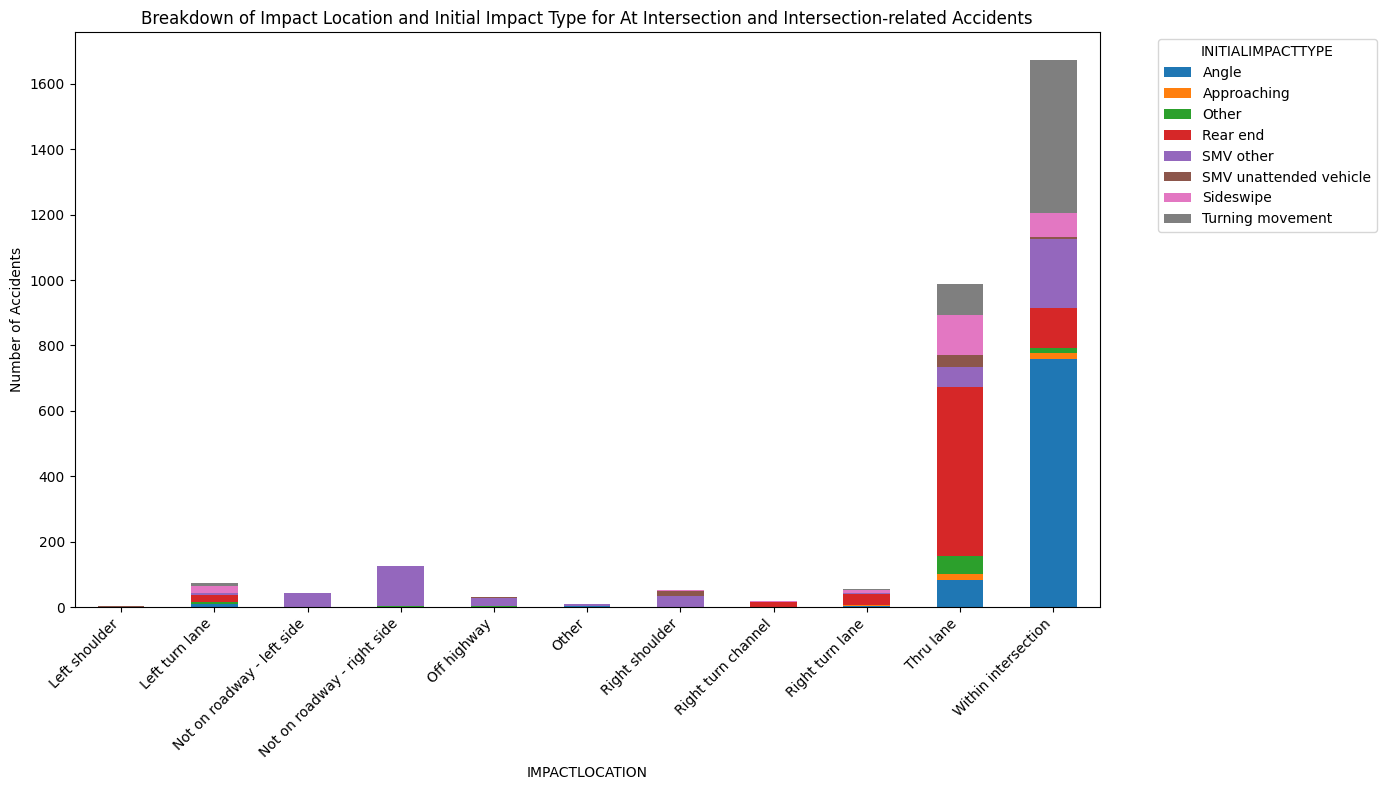

In [ ]:
filtered_df = df[df['ACCIDENTLOCATION'].isin(['At intersection', 'Intersection related'])]

# Group by IMPACTLOCATION and INITIALIMPACTTYPE
breakdown = filtered_df.groupby(['IMPACTLOCATION', 'INITIALIMPACTTYPE']).size().unstack(fill_value=0)

print("Breakdown of IMPACTLOCATION and INITIALIMPACTTYPE for at intersection and intersection related accidents:")
print(breakdown)

breakdown.plot(kind='bar', stacked=True, figsize=(14, 8), title="Breakdown of Impact Location and Initial Impact Type for At Intersection and Intersection-related Accidents")
plt.xlabel("IMPACTLOCATION")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="INITIALIMPACTTYPE", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Severity of collision by impact location and type, for all 'At intersection' or 'Intersection related' accidents

**Note**:  PD = Property Damage.

In [ ]:
filtered_df = df[df['ACCIDENTLOCATION'].isin(['At intersection', 'Intersection related'])]

### 1. Impact location vs. classification of accident

Breakdown of IMPACTLOCATION and CLASSIFICATIONOFACCIDENT:
CLASSIFICATIONOFACCIDENT     Fatal injury  Non-fatal injury  Non-reportable  \
IMPACTLOCATION                                                                
Left shoulder                           0                 0               0   
Left turn lane                          0                12               8   
Not on roadway - left side              0                 6               1   
Not on roadway - right side             1                18               1   
Off highway                             0                 8               0   
Other                                   0                 2               0   
Right shoulder                          0                 6               2   
Right turn channel                      0                 2               2   
Right turn lane                         0                 4              11   
Thru lane                               0               130             1

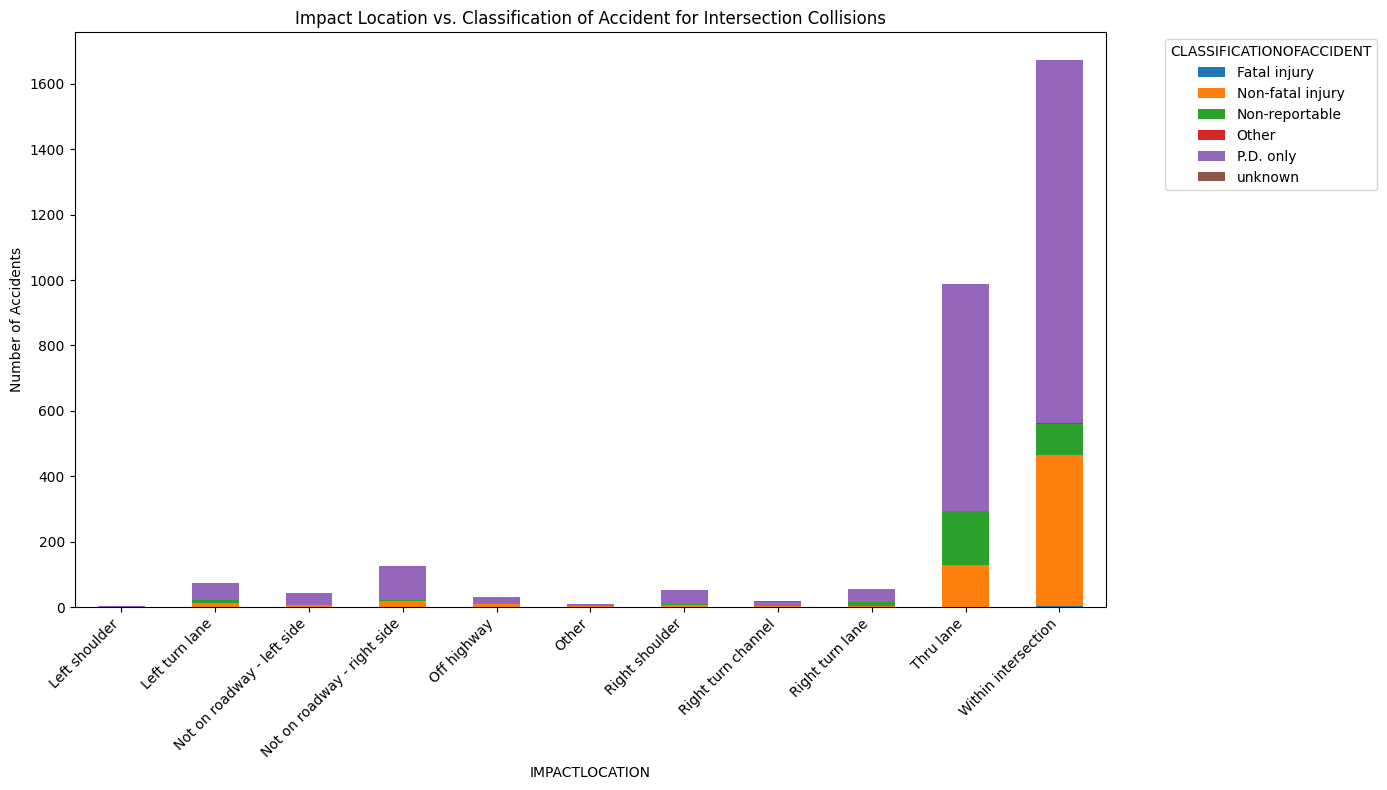

In [ ]:
# 1. Analyze IMPACTLOCATION in relation to CLASSIFICATIONOFACCIDENT
impact_location_classification_breakdown = filtered_df.groupby(['IMPACTLOCATION', 'CLASSIFICATIONOFACCIDENT']).size().unstack(fill_value=0)

print("Breakdown of IMPACTLOCATION and CLASSIFICATIONOFACCIDENT:")
print(impact_location_classification_breakdown)

impact_location_classification_breakdown.plot(kind='bar', stacked=True, figsize=(14, 8), title="Impact Location vs. Classification of Accident for Intersection Collisions")
plt.xlabel("IMPACTLOCATION")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="CLASSIFICATIONOFACCIDENT", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2. Initial impact type vs. classification of accident


Breakdown of INITIALIMPACTTYPE and CLASSIFICATIONOFACCIDENT:
CLASSIFICATIONOFACCIDENT  Fatal injury  Non-fatal injury  Non-reportable  \
INITIALIMPACTTYPE                                                          
Angle                                1               207              58   
Approaching                          0                 7               2   
Other                                0                 3              12   
Rear end                             0               115             122   
SMV other                            4               169              18   
SMV unattended vehicle               0                 5               3   
Sideswipe                            0                12              45   
Turning movement                     0               132              23   

CLASSIFICATIONOFACCIDENT  Other  P.D. only  unknown  
INITIALIMPACTTYPE                                    
Angle                         0        591        1  
Approaching    

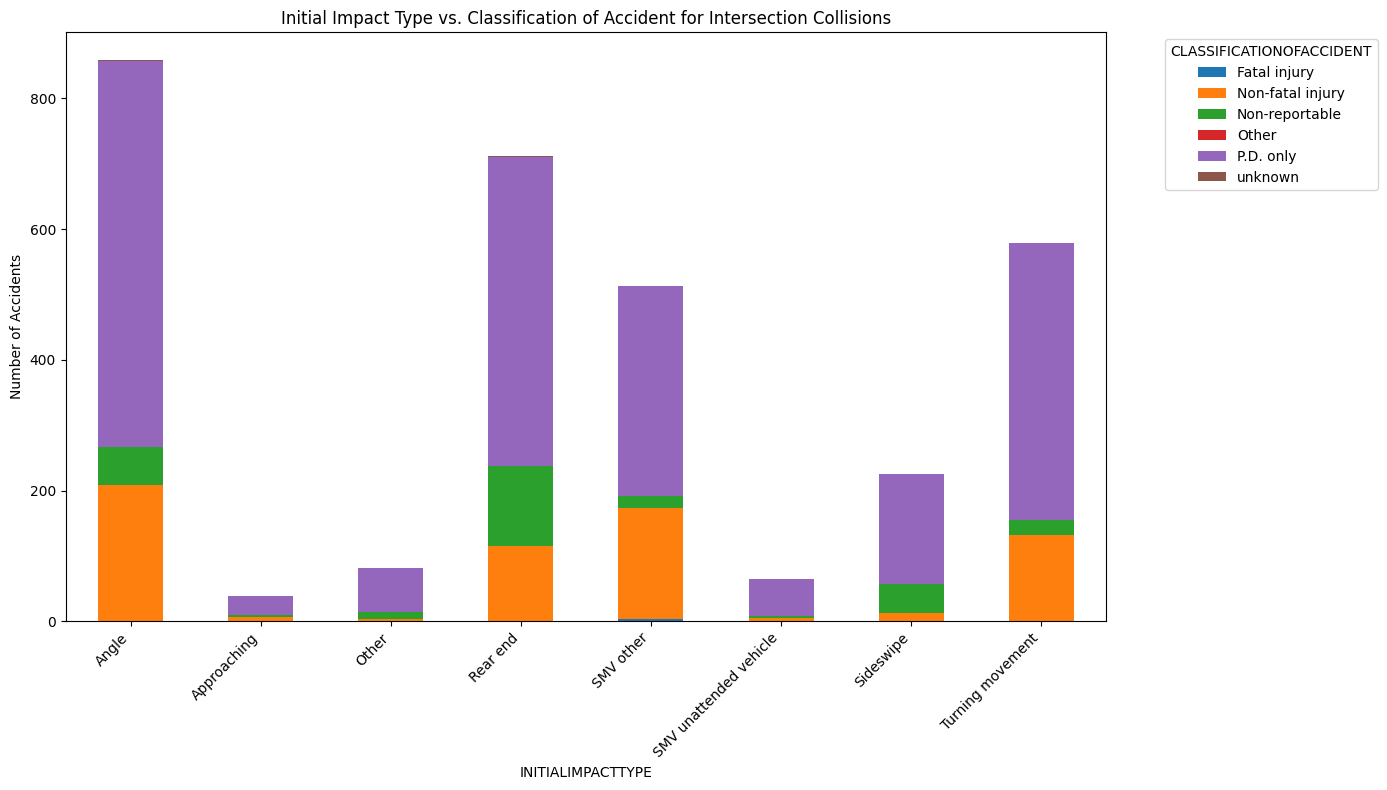

In [ ]:
# 2. Analyze INITIALIMPACTTYPE in relation to CLASSIFICATIONOFACCIDENT
initial_impact_type_classification_breakdown = filtered_df.groupby(['INITIALIMPACTTYPE', 'CLASSIFICATIONOFACCIDENT']).size().unstack(fill_value=0)

print("\nBreakdown of INITIALIMPACTTYPE and CLASSIFICATIONOFACCIDENT:")
print(initial_impact_type_classification_breakdown)

initial_impact_type_classification_breakdown.plot(kind='bar', stacked=True, figsize=(14, 8), title="Initial Impact Type vs. Classification of Accident for Intersection Collisions")
plt.xlabel("INITIALIMPACTTYPE")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="CLASSIFICATIONOFACCIDENT", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3. Analyzing the controller in the intersection vs. classification of accident


Breakdown of TRAFFICCONTROL and CLASSIFICATIONOFACCIDENT:
CLASSIFICATIONOFACCIDENT  Fatal injury  Non-fatal injury  Non-reportable  \
TRAFFICCONTROL                                                             
No control                           0                31               2   
Other                                0                 0               1   
Ped. crossover                       0                 0               0   
School guard                         0                 0               0   
Stop sign                            3               315             111   
Traffic signal                       1               205              69   
Yield sign                           0                11              11   
unknown                              1                88              89   

CLASSIFICATIONOFACCIDENT  Other  P.D. only  unknown  
TRAFFICCONTROL                                       
No control                    0        107        0  
Other             

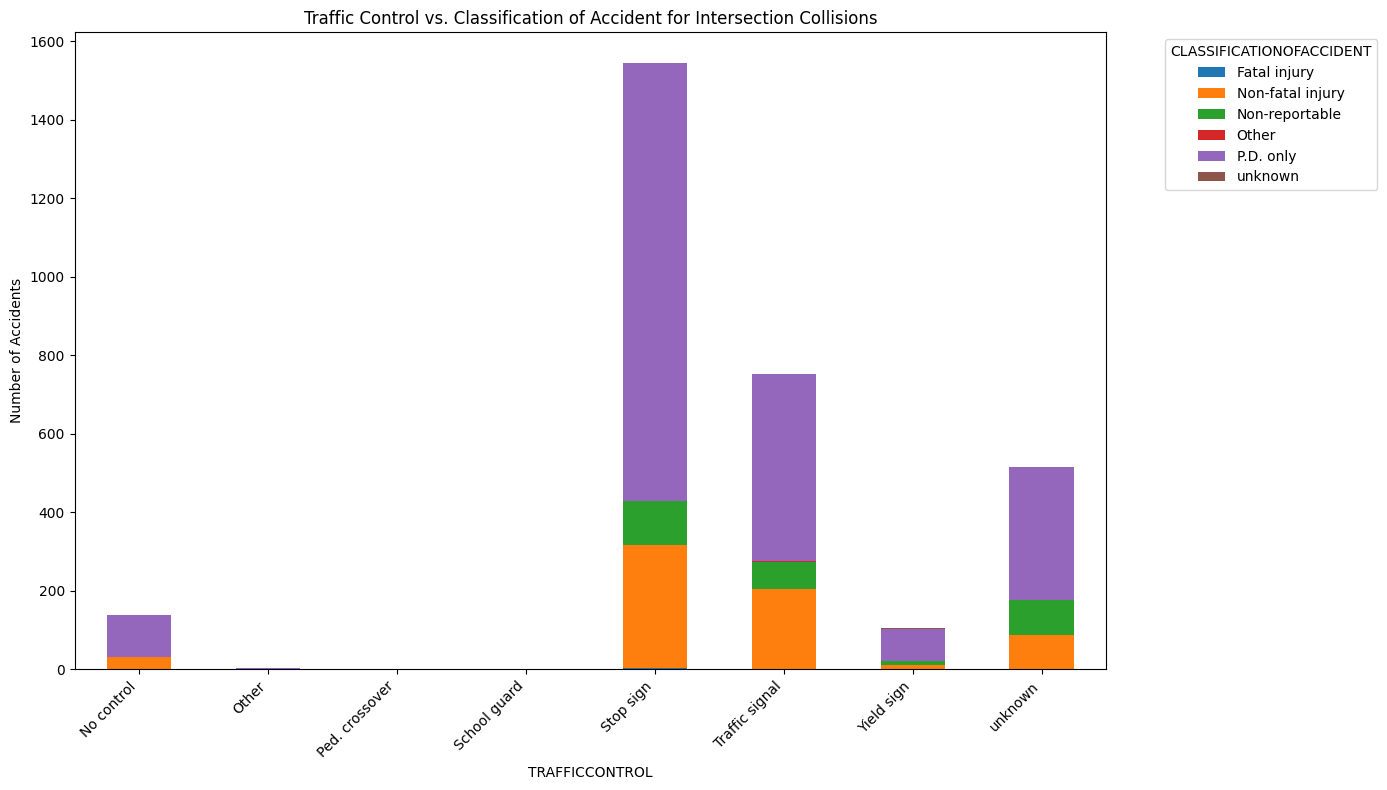

In [ ]:
# 3. Analyze TRAFFICCONTROL in relation to CLASSIFICATIONOFACCIDENT
traffic_control_classification_breakdown = filtered_df.groupby(['TRAFFICCONTROL', 'CLASSIFICATIONOFACCIDENT']).size().unstack(fill_value=0)

print("\nBreakdown of TRAFFICCONTROL and CLASSIFICATIONOFACCIDENT:")
print(traffic_control_classification_breakdown)

traffic_control_classification_breakdown.plot(kind='bar', stacked=True, figsize=(14, 8), title="Traffic Control vs. Classification of Accident for Intersection Collisions")
plt.xlabel("TRAFFICCONTROL")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="CLASSIFICATIONOFACCIDENT", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Only accidents in intersections that cause injury, broken down by impact type

Fatal Injury - Inside Intersection by Initial Impact Type:
INITIALIMPACTTYPE
SMV other    4
Angle        1
Name: count, dtype: int64

Fatal Injury - Related to Intersection by Initial Impact Type:
Series([], Name: count, dtype: int64)


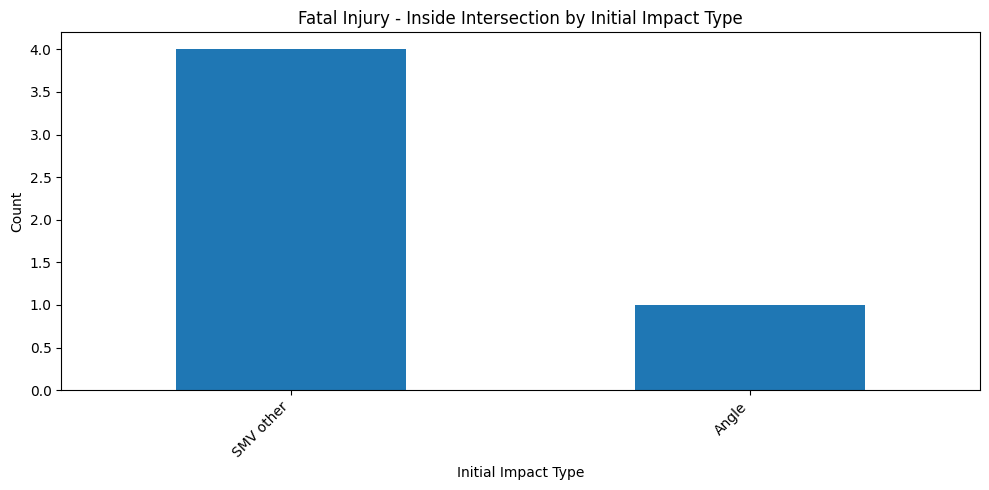

In [ ]:

# All fatal injury INSIDE intersection -> break down by initial impact type

filtered_df_intersection = df[
    (df['ACCIDENTLOCATION'] == 'At intersection') &
    (df['CLASSIFICATIONOFACCIDENT'] == 'Fatal injury')
]


# All fatal injury RELATED TO intersection -> break down by initial impact type

filtered_df_related = df[
    (df['ACCIDENTLOCATION'] == 'Intersection related') &
    (df['CLASSIFICATIONOFACCIDENT'] == 'Fatal injury')
]

impact_type_count_intersection = filtered_df_intersection['INITIALIMPACTTYPE'].value_counts()
impact_type_count_related = filtered_df_related['INITIALIMPACTTYPE'].value_counts()

print("Fatal Injury - Inside Intersection by Initial Impact Type:")
print(impact_type_count_intersection)

print("\nFatal Injury - Related to Intersection by Initial Impact Type:")
print(impact_type_count_related)

plt.figure(figsize=(10, 5))
impact_type_count_intersection.plot(kind='bar')
plt.title('Fatal Injury - Inside Intersection by Initial Impact Type')
plt.xlabel('Initial Impact Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# plt.figure(figsize=(10, 5))
# impact_type_count_related.plot(kind='bar')
# plt.title('Fatal Injury - Related to Intersection by Initial Impact Type')
# plt.xlabel('Initial Impact Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

Nonfatal Injury - Inside Intersection by Initial Impact Type:
INITIALIMPACTTYPE
Angle                     186
SMV other                 119
Turning movement          116
Rear end                   12
Sideswipe                   5
Approaching                 3
SMV unattended vehicle      1
Other                       1
Name: count, dtype: int64

Nonfatal Injury - Related to Intersection by Initial Impact Type:
INITIALIMPACTTYPE
Rear end                  103
SMV other                  50
Angle                      21
Turning movement           16
Sideswipe                   7
SMV unattended vehicle      4
Approaching                 4
Other                       2
Name: count, dtype: int64


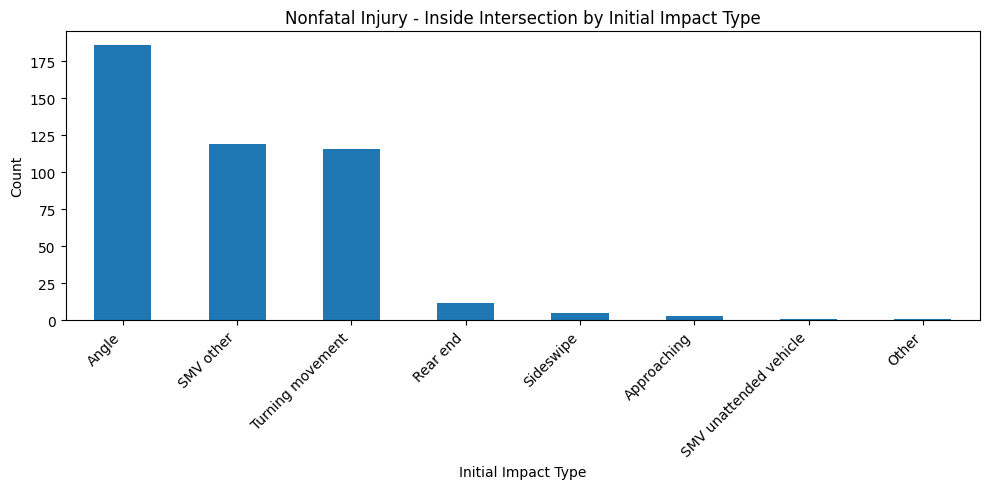

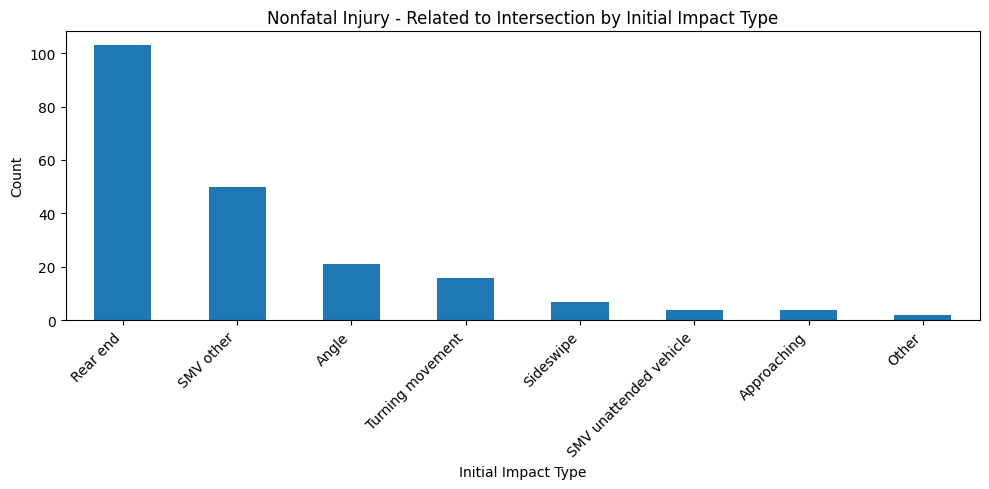

In [ ]:
# All injury INSIDE intersection -> break down by initial impact type

filtered_df_intersection = df[
    (df['ACCIDENTLOCATION'] == 'At intersection') &
    (df['CLASSIFICATIONOFACCIDENT'] == 'Non-fatal injury')
]


# All injury RELATED TO intersection -> break down by initial impact type

filtered_df_related = df[
    (df['ACCIDENTLOCATION'] == 'Intersection related') &
    (df['CLASSIFICATIONOFACCIDENT'] == 'Non-fatal injury')
]

impact_type_count_intersection = filtered_df_intersection['INITIALIMPACTTYPE'].value_counts()
impact_type_count_related = filtered_df_related['INITIALIMPACTTYPE'].value_counts()

print("Nonfatal Injury - Inside Intersection by Initial Impact Type:")
print(impact_type_count_intersection)

print("\nNonfatal Injury - Related to Intersection by Initial Impact Type:")
print(impact_type_count_related)

plt.figure(figsize=(10, 5))
impact_type_count_intersection.plot(kind='bar')
plt.title('Nonfatal Injury - Inside Intersection by Initial Impact Type')
plt.xlabel('Initial Impact Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
impact_type_count_related.plot(kind='bar')
plt.title('Nonfatal Injury - Related to Intersection by Initial Impact Type')
plt.xlabel('Initial Impact Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Roundabout crash analysis

In [ ]:
# For Distance_Category in results.csv, if Medium or High, classify TRAFFICCONTROL as Roundabout

df = pd.read_csv('/content/drive/My Drive/CAPSTONE 🧢🪨/3. Resources & data/Waterloo Collision Reports/results.csv')

df.loc[df['Distance_Category'].isin(['Medium', 'High']), 'TRAFFICCONTROL'] = 'Roundabout'

intersection_crashes = df[df['ACCIDENTLOCATION'].isin(['At intersection', 'Intersection related'])]
roundabout_crashes = df[df['TRAFFICCONTROL'] == 'Roundabout']

### Crash percentages

1. Total number of roundabout crashes from 2015-2022
2. How many intersection-related crashes were roundabout related?

In [ ]:
total_crashes = len(df)

roundabout_crashes = df[df['TRAFFICCONTROL'] == 'Roundabout']
total_roundabout_crashes = len(roundabout_crashes)

percentage_roundabout_all = (total_roundabout_crashes / total_crashes) * 100

intersection_crashes = df[df['ACCIDENTLOCATION'].isin(['At intersection', 'Intersection related'])]
total_intersection_crashes = len(intersection_crashes)

intersection_roundabout_crashes = intersection_crashes[intersection_crashes['TRAFFICCONTROL'] == 'Roundabout']
total_intersection_roundabout_crashes = len(intersection_roundabout_crashes)
percentage_roundabout_intersection = (total_intersection_roundabout_crashes / total_intersection_crashes) * 100

print("Roundabout Crashes - Overall:")
print(f"Total: {total_roundabout_crashes}")
print(f"Percentage of all crashes: {percentage_roundabout_all:.2f}%")
print(f"Percentage of intersection-related crashes: {percentage_roundabout_intersection:.2f}%")


Roundabout Crashes - Overall:
Total: 158
Percentage of all crashes: 1.77%
Percentage of intersection-related crashes: 4.04%


### Intersection type (traffic controller) vs. classification of accident


Breakdown of TRAFFICCONTROL and CLASSIFICATIONOFACCIDENT:
CLASSIFICATIONOFACCIDENT  Fatal injury  Non-fatal injury  Non-reportable  \
TRAFFICCONTROL                                                             
No control                           0                31               2   
Other                                0                 0               1   
Ped. crossover                       0                 0               0   
Roundabout                           0                14              14   
School guard                         0                 0               0   
Stop sign                            3               311             107   
Traffic signal                       1               203              69   
Yield sign                           0                 3               5   
unknown                              1                88              85   

CLASSIFICATIONOFACCIDENT  Other  P.D. only  unknown  
TRAFFICCONTROL                                    

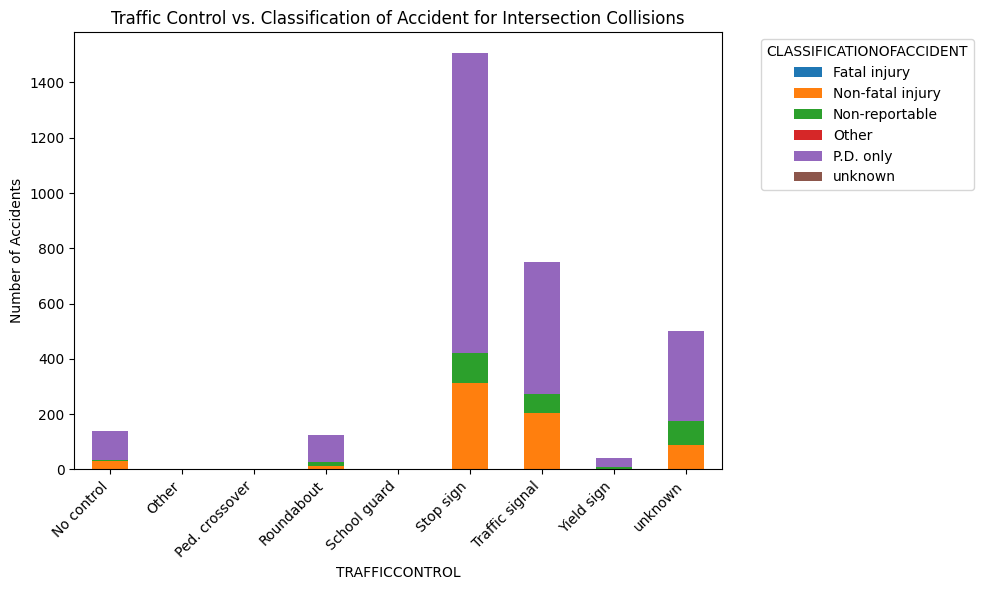

In [ ]:
traffic_control_classification_breakdown = intersection_crashes.groupby(['TRAFFICCONTROL', 'CLASSIFICATIONOFACCIDENT']).size().unstack(fill_value=0)

print("\nBreakdown of TRAFFICCONTROL and CLASSIFICATIONOFACCIDENT:")
print(traffic_control_classification_breakdown)

traffic_control_classification_breakdown.plot(kind='bar', stacked=True, figsize=(10, 6), title="Traffic Control vs. Classification of Accident for Intersection Collisions")
plt.xlabel("TRAFFICCONTROL")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="CLASSIFICATIONOFACCIDENT", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Roundabout crashes by parties involved (pedestrian, cyclist, etc.) and classification of accident

<ipython-input-38-6bfafe1affe5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roundabout_crashes['INVOLVED_PARTY'] = roundabout_crashes.apply(categorize_involved_party, axis=1)



Breakdown of Involved Party and Classification of Accident for Roundabout Crashes:
CLASSIFICATIONOFACCIDENT  Non-fatal injury  Non-reportable  P.D. only
INVOLVED_PARTY                                                       
Cyclist                                  1               0          0
Motorcyclist                             2               0          0
Other (Vehicle only)                    11              20        123
Pedestrian                               1               0          0


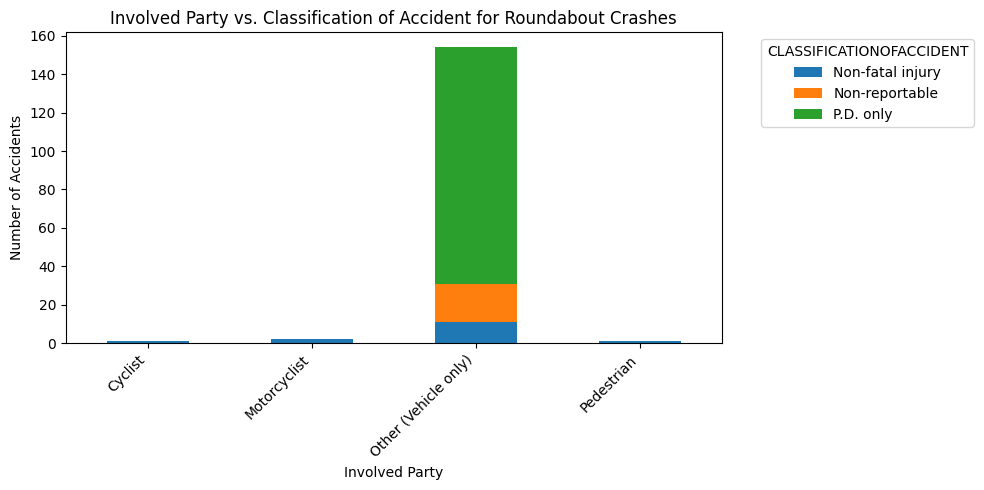

In [ ]:
def categorize_involved_party(row):
    if row['PEDESTRIANINVOLVED']:
        return 'Pedestrian'
    elif row['CYCLISTINVOLVED']:
        return 'Cyclist'
    elif row['MOTORCYCLISTINVOLVED']:
        return 'Motorcyclist'
    else:
        return 'Other (Vehicle only)'

roundabout_crashes['INVOLVED_PARTY'] = roundabout_crashes.apply(categorize_involved_party, axis=1)

involved_party_classification_breakdown = roundabout_crashes.groupby(['INVOLVED_PARTY', 'CLASSIFICATIONOFACCIDENT']).size().unstack(fill_value=0)

print("\nBreakdown of Involved Party and Classification of Accident for Roundabout Crashes:")
print(involved_party_classification_breakdown)

involved_party_classification_breakdown.plot(kind='bar', stacked=True, figsize=(10, 5), title="Involved Party vs. Classification of Accident for Roundabout Crashes")
plt.xlabel("Involved Party")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="CLASSIFICATIONOFACCIDENT", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Roundabout crashes by impact location and parties involved


Breakdown of Impact Location and Involved Party for Roundabout Crashes:
INVOLVED_PARTY               Cyclist  Motorcyclist  Other (Vehicle only)  \
IMPACTLOCATION                                                             
Left shoulder                      0             0                     2   
Left turn lane                     0             0                     2   
Not on roadway - left side         0             0                     2   
Not on roadway - right side        0             0                     6   
Off highway                        0             0                     1   
Other                              0             0                     5   
Passing lane                       0             0                     1   
Right turn channel                 0             0                     1   
Right turn lane                    0             0                     3   
Thru lane                          0             1                    58   
Within intersec

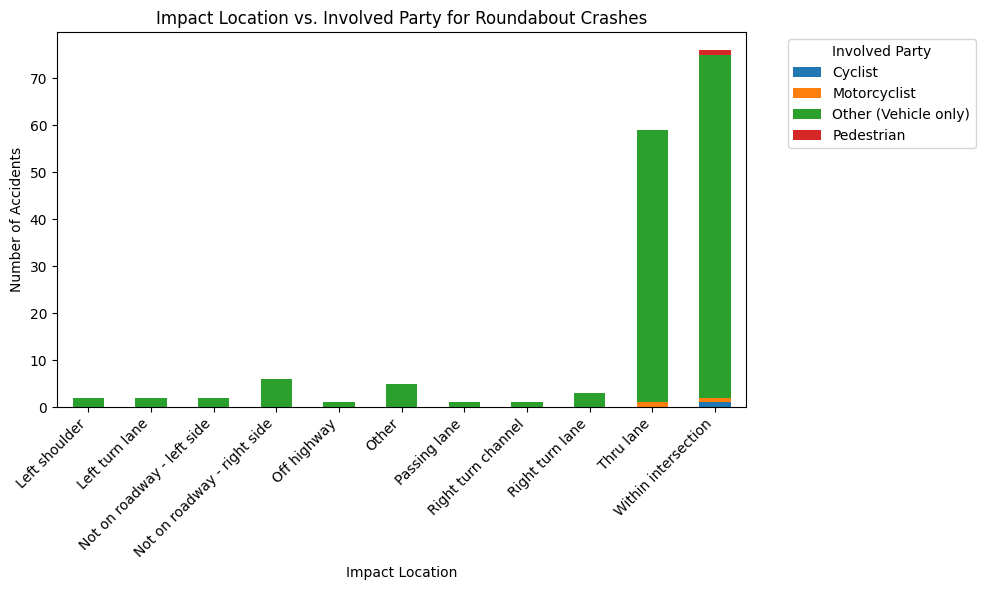

In [ ]:
impact_location_involved_party_breakdown = roundabout_crashes.groupby(['IMPACTLOCATION', 'INVOLVED_PARTY']).size().unstack(fill_value=0)

print("\nBreakdown of Impact Location and Involved Party for Roundabout Crashes:")
print(impact_location_involved_party_breakdown)

impact_location_involved_party_breakdown.plot(kind='bar', stacked=True, figsize=(10, 6), title="Impact Location vs. Involved Party for Roundabout Crashes")
plt.xlabel("Impact Location")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Involved Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Roundabout crashes, impact location vs. classification of accident


Breakdown of Impact Location and Classification of Accident for Roundabout Crashes:
CLASSIFICATIONOFACCIDENT     Non-fatal injury  Non-reportable  P.D. only
IMPACTLOCATION                                                          
Left shoulder                               0               0          2
Left turn lane                              0               0          2
Not on roadway - left side                  0               0          2
Not on roadway - right side                 1               0          5
Off highway                                 0               0          1
Other                                       0               0          5
Passing lane                                0               1          0
Right turn channel                          0               0          1
Right turn lane                             1               0          2
Thru lane                                   6              11         42
Within intersection                    

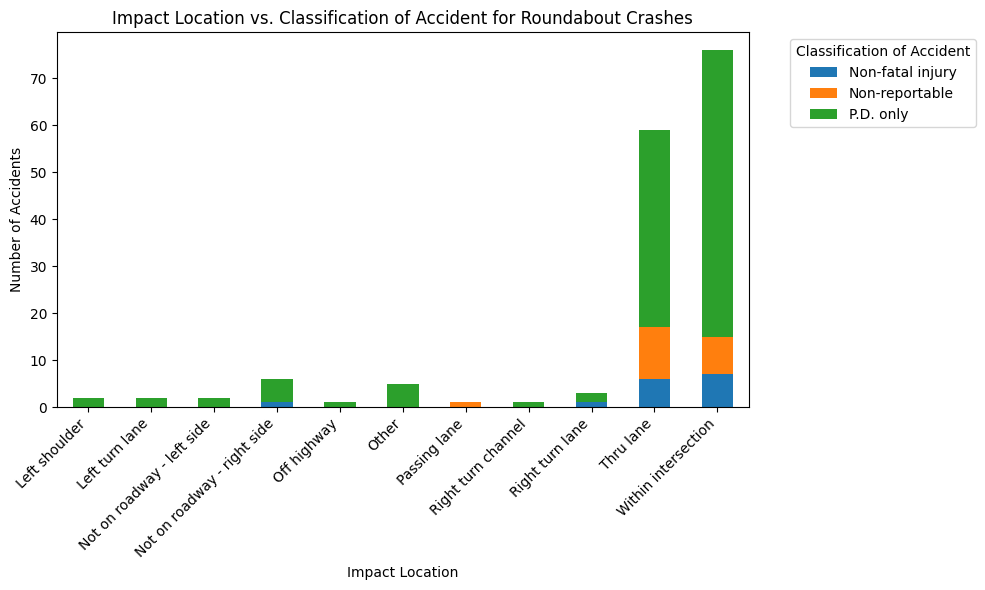

In [ ]:
impact_location_classification_breakdown = roundabout_crashes.groupby(['IMPACTLOCATION', 'CLASSIFICATIONOFACCIDENT']).size().unstack(fill_value=0)

print("\nBreakdown of Impact Location and Classification of Accident for Roundabout Crashes:")
print(impact_location_classification_breakdown)

impact_location_classification_breakdown.plot(kind='bar', stacked=True, figsize=(10, 6), title="Impact Location vs. Classification of Accident for Roundabout Crashes")
plt.xlabel("Impact Location")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classification of Accident", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
